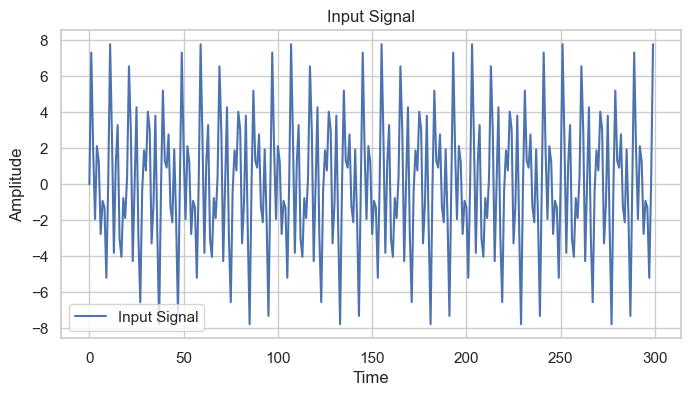

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

def plot_graph(input_array, title):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, label=title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_input_output(input_array, output_array):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, label='Input')
    plt.plot(output_array, label='Output')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Input vs Output')
    plt.legend()
    plt.show()

inputSignal = np.loadtxt('noise.csv', delimiter=',', dtype=float)

plot_graph(inputSignal[:300], title="Input Signal")

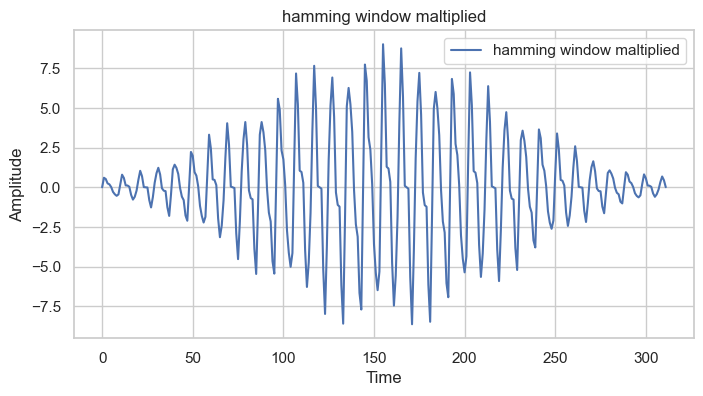

In [2]:
data = [0.000000, 0.600764, 0.522639, 0.246432, 0.186492, 0.014787, -0.288067, -0.439907, -0.537374, -0.448300, 0.187891, 0.794418, 0.586433, 0.119668, 0.112365, 0.033335, -0.479297, -0.775534, -0.598270, -0.207834, 0.468793, 1.039308, 0.702573, 0.011687, -0.000000, -0.012496, -0.803034, -1.269581, -0.611779, 0.289595, 0.889472, 1.229248, 0.809142, -0.059871, -0.214433, -0.242311, -1.257958, -1.802223, -0.449955, 1.131014, 1.425225, 1.223742, 0.838504, -0.044924, -0.589844, -0.809239, -1.777005, -2.109030, -0.000000, 2.229341, 1.985527, 0.955776, 0.736388, 0.059284, -1.169620, -1.804292, -2.221108, -1.863003, 0.783357, 3.316102, 2.446200, 0.497940, 0.465628, 0.137362, -1.961225, -3.147260, -2.405155, -0.826860, 1.844020, 4.038699, 2.695175, 0.044231, 0.000000, -0.045954, -2.909257, -4.529414, -2.148724, 1.001092, 3.025711, 4.114127, 2.664125, -0.193910, -0.683136, -0.759292, -3.877227, -5.464347, -1.341818, 3.317874, 4.113126, 3.474650, 2.342607, -0.123507, -1.595934, -2.155121, -4.658591, -5.443469, -0.000000, 5.579542, 4.894431, 2.320855, 1.761676, 0.139748, -2.717102, -4.131257, -5.013277, -4.145760, 1.718899, 7.176747, 5.221138, 1.048411, 0.967241, 0.281552, -3.967140, -6.283414, -4.739960, -1.608744, 3.542398, 7.661308, 5.049284, 0.081847, -0.000000, -0.082987, -5.190952, -7.986036, -3.744036, 1.724041, 5.150611, 6.923235, 4.432282, -0.318973, -1.111176, -1.221360, -6.168115, -8.598097, -2.088458, 5.108514, 6.265313, 5.236610, 3.493321, -0.182248, -2.330478, -3.114518, -6.663321, -7.706479, 0.000000, 7.740067, 6.721537, 3.155427, 2.371390, 0.186257, -3.585762, -5.398687, -6.487507, -5.312871, 2.181537, 9.019788, 6.499847, 1.292726, 1.181304, 0.340607, -4.753919, -7.458704, -5.573757, -1.874035, 4.088052, 8.759117, 5.719198, 0.091846, -0.000000, -0.091413, -5.664363, -8.635673, -4.011400, 1.830205, 5.417650, 7.215480, 4.577098, -0.326381, -1.126588, -1.226980, -6.139858, -8.479528, -2.041051, 4.946884, 6.011552, 4.978494, 3.290686, -0.170101, -2.155163, -2.853721, -6.049102, -6.931524, -0.000000, 6.833439, 5.879104, 2.734257, 2.035693, 0.158394, -3.020743, -4.505198, -5.362705, -4.350127, 1.769243, 7.245332, 5.171139, 1.018578, 0.921800, 0.263207, -3.637858, -5.651813, -4.181983, -1.392197, 3.006811, 6.378139, 4.122767, 0.065541, -0.000000, -0.063910, -3.920190, -5.913794, -2.718481, 1.227328, 3.594775, 4.736902, 2.972729, -0.209697, -0.715980, -0.771270, -3.817014, -5.213679, -1.240793, 2.973438, 3.572361, 2.924601, 1.910789, -0.097622, -1.222337, -1.599361, -3.349684, -3.792033, -0.000000, 3.647510, 3.098743, 1.423336, 1.046303, 0.080372, -1.513041, -2.227223, -2.616314, -2.094145, 0.840297, 3.394949, 2.389651, 0.464198, 0.414234, 0.116612, -1.588803, -2.432913, -1.774080, -0.581944, 1.238266, 2.587423, 1.647278, 0.025789, -0.000000, -0.024378, -1.471760, -2.185689, -0.988814, 0.439305, 1.266049, 1.641366, 1.013359, -0.070318, -0.236167, -0.250237, -1.218112, -1.636545, -0.383102, 0.903085, 1.067374, 0.859749, 0.552751, -0.027795, -0.342617, -0.441467, -0.910706, -1.016197, 0.000000, 0.950826, 0.797540, 0.361845, 0.262992, 0.019992, -0.372837, -0.544304, -0.634927, -0.505355, 0.201946, 0.813788, 0.572474, 0.111339, 0.099678, 0.028213, -0.387369, -0.599204, -0.442494, -0.147379, 0.319269, 0.681073, 0.443909, 0.007135]
plot_graph(data, title="hamming window maltiplied")

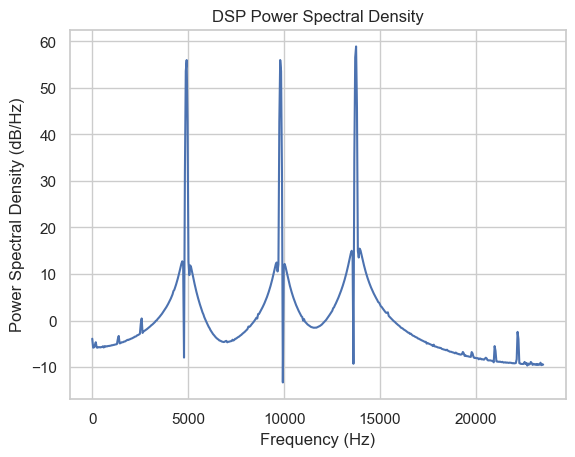

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load PSD data from the CSV file
data = np.loadtxt('psd.csv', delimiter=' ')

# Extract frequency and PSD values
frequency = data[:, 0]
psd_dB = data[:, 1]

# Plot the PSD in dB/Hz scale
plt.plot(frequency, psd_dB)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('DSP Power Spectral Density')
plt.grid(True)
plt.show()


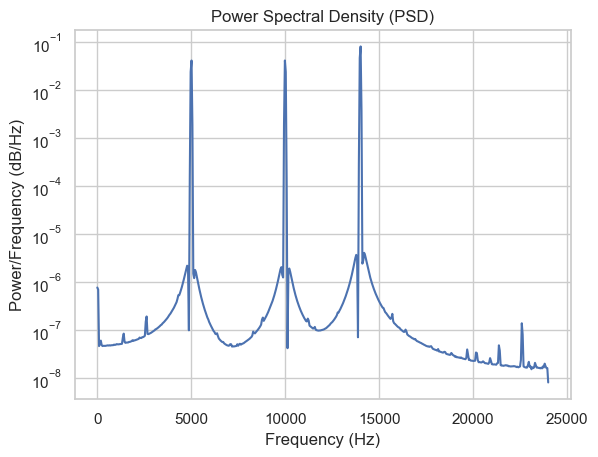

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

inputSignal = np.loadtxt('noise.csv', delimiter=',', dtype=float)

fs = 48000  # Sampling frequency
SIGNAL_LENGTH = 102400  # Length of input signal
FFT_LENGTH = 1024  # Length of FFT

# Calculate PSD using Welch's method
frequencies, psd = welch(inputSignal, fs=fs, nperseg=FFT_LENGTH, nfft=FFT_LENGTH, noverlap=FFT_LENGTH*0.5,window="hamming")

# Plot the PSD
plt.figure()
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()
